In [7]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load dataset
file_path = "Life-Expectancy-Data-Updated.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

# Step 2: Display basic information
print("Data Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

# Step 3: Missing values check
print("\nMissing Values (Count):\n", df.isnull().sum())
print("\nMissing Values (Percentage):\n", df.isnull().mean() * 100)

# Step 4: Duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Step 5: Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Data Shape: (2864, 21)

Column Names: ['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Life_expectancy']

Data Types:
 Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 floa

### **EDA**

### **Variation in Life Expectancy Across Countries**

**Observation**:  
Life expectancy in the dataset ranges from **39.4 years** to **83.8 years**, with a global average of approximately **68.9 years**.

**Interpretation**:  
This wide range indicates substantial disparity in public health and living conditions. Countries at the lower end of the spectrum are likely impacted by factors such as high child mortality, limited healthcare infrastructure, and lower GDP per capita.

---

### **Relationship Between GDP Per Capita and Life Expectancy**

**Observation**:  
A positive correlation was observed between GDP per capita and life expectancy. Countries with higher economic output generally tend to report higher life expectancy values.

**Interpretation**:  
This suggests that economic prosperity is a key enabler for health investments, education, and access to basic services, which contribute to improved population health outcomes.

---

### **Education Level (Schooling) and Life Expectancy**

**Observation**:  
Higher average years of schooling are associated with greater life expectancy. The majority of countries with schooling above 10 years report life expectancy above 75 years.

**Interpretation**:  
Education likely contributes to better health awareness, family planning, and utilization of healthcare services, all of which positively impact lifespan.

---

### **Regional Differences in Key Health Indicators**

**Observation**:  
African countries consistently show higher infant mortality, under-five deaths, and lower GDP per capita compared to regions such as Europe or North America.

**Interpretation**:  
Geographic and developmental differences strongly influence public health outcomes. These gaps emphasize the need for regional strategies in health planning.

---

### **Alcohol Consumption and BMI Levels**

**Observation**:  
Countries with higher alcohol consumption often also exhibit higher BMI averages, although there are exceptions based on dietary and cultural practices.

**Interpretation**:  
While not causally conclusive, this trend may point to lifestyle-driven health risks in economically advanced nations. It may also indicate a need to evaluate non-communicable disease risk.



### **Creating New Columns to Draw Insights**

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
file_path = "Life-Expectancy-Data-Updated.xlsx"  # Adjust path as needed
df = pd.read_excel(file_path)

# Fill missing values (if any)
df.fillna(0, inplace=True)

# -------------------- 1. Graph Algorithms --------------------
# Select features for similarity-based graph
features = ['GDP_per_capita', 'Life_expectancy', 'Schooling', 'Alcohol_consumption', 'BMI']

# Normalize selected features
scaler = StandardScaler()
normalized = scaler.fit_transform(df[features])

# Create similarity matrix
similarity_matrix = cosine_similarity(normalized)

# Add a unique ID for country-year combination
df['Country_Year_ID'] = df['Country'] + "_" + df['Year'].astype(str)

# -------------------- 2. Dynamic Programming --------------------
# Create proxy for benefit: potential health improvement (max - current life expectancy)
max_life = df['Life_expectancy'].max()
df['Health_Gap'] = max_life - df['Life_expectancy']

# Normalize health gap and GDP (used as proxy cost)
df['Norm_Health_Benefit'] = df['Health_Gap'] / df['Health_Gap'].max()
df['Norm_GDP_Cost'] = (df['GDP_per_capita'] - df['GDP_per_capita'].min()) / \
                      (df['GDP_per_capita'].max() - df['GDP_per_capita'].min())

# -------------------- 3. Linear/Integer Programming --------------------
# Binary flags for need-based intervention targeting
df['Needs_Health_Investment'] = (df['Life_expectancy'] < 65).astype(int)
df['Needs_Education_Investment'] = (df['Schooling'] < 6).astype(int)

# -------------------- 4. Machine Learning Preparation --------------------
# One-hot encode the Region column
#df = pd.get_dummies(df, columns=['Region'], drop_first=True)

# The dataset now includes:
# - Country_Year_ID
# - Norm_GDP_Cost
# - Norm_Health_Benefit
# - Health and Education investment needs
# - Encoded region categories

# Preview the updated DataFrame
print(df.head())
df1=df


   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Schooling  Economy_status_Developed  Economy_status_Developing  \
0        7.8                         0               

### **Insight - 1 MST Approach for Health Exemplar Countries**

                          Region Health_Exemplar_Country  Degree_in_MST  \
0                         Africa                   Kenya              4   
1                           Asia                Cambodia              4   
2  Central America and Caribbean                  Panama              3   
3                 European Union                 Belgium              5   
4                    Middle East                    Iraq              3   
5                  North America                  Canada              2   
6                        Oceania                Kiribati              3   
7                 Rest of Europe                 Albania              4   
8                  South America                 Uruguay              3   

   Total_Countries  
0              816  
1              432  
2              304  
3              432  
4              224  
5               48  
6              176  
7              240  
8              192  


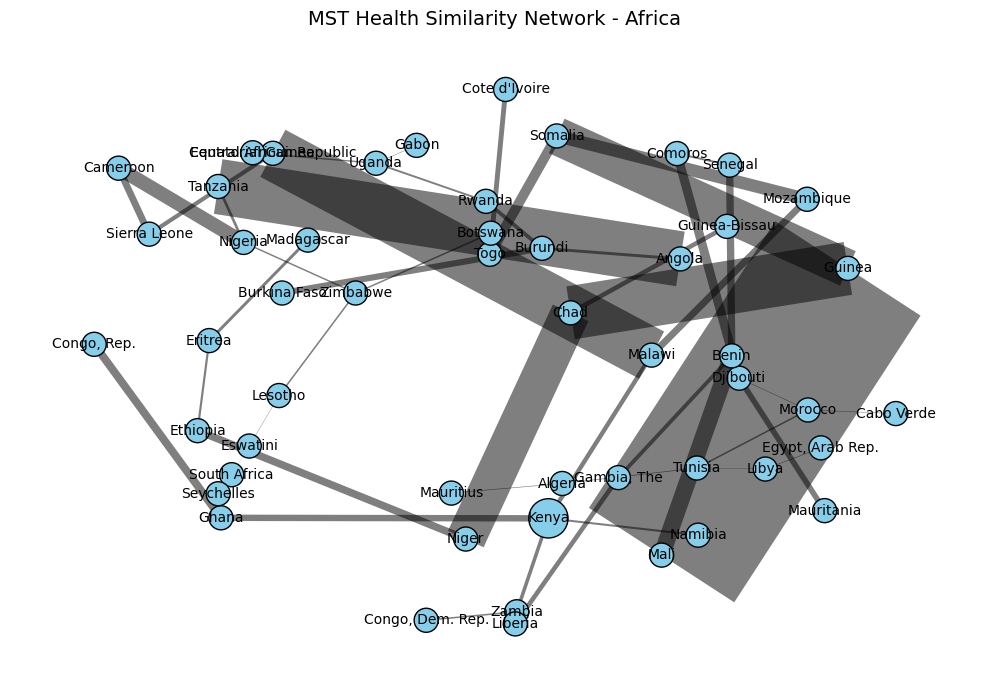

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Prepare data
df_latest_scaled = df1.copy()
features = ['GDP_per_capita', 'Life_expectancy', 'Schooling', 'BMI', 'Alcohol_consumption']
df_latest_scaled[features] = StandardScaler().fit_transform(df_latest_scaled[features])

# Build MSTs by region
mst_results = []
for region, group in df_latest_scaled.groupby("Region"):
    countries = group['Country'].tolist()
    dist = 1 - cosine_similarity(group[features].values)

    G = nx.Graph([(countries[i], countries[j], {'weight': dist[i, j]})
                  for i in range(len(countries)) for j in range(i + 1, len(countries))])
    mst = nx.minimum_spanning_tree(G)
    degrees = dict(mst.degree())
    exemplar = max(degrees, key=degrees.get)

    mst_results.append({
        'Region': region,
        'Health_Exemplar_Country': exemplar,
        'Degree_in_MST': degrees[exemplar],
        'Total_Countries': len(countries)
    })

mst_df = pd.DataFrame(mst_results)
print(mst_df)

# Plot MST for a given region with reduced edge width
def plot_region_mst(region_name):
    region = df_latest_scaled[df_latest_scaled['Region'] == region_name]
    countries = region['Country'].tolist()
    dist = 1 - cosine_similarity(region[features].values)

    G = nx.Graph([(countries[i], countries[j], {'weight': dist[i, j]})
                  for i in range(len(countries)) for j in range(i + 1, len(countries))])
    mst = nx.minimum_spanning_tree(G)
    exemplar = mst_df[mst_df['Region'] == region_name]['Health_Exemplar_Country'].values[0]

    pos = nx.spring_layout(mst, seed=42)
    # Reduce line thickness by scaling similarity scores down
    edge_weights = [0.05 * (1 / (d['weight'] + 1e-6)) for _, _, d in mst.edges(data=True)]
    node_sizes = [800 if node == exemplar else 300 for node in mst.nodes()]

    plt.figure(figsize=(10, 7))
    nx.draw_networkx_edges(mst, pos, alpha=0.5, width=edge_weights)
    nx.draw_networkx_nodes(mst, pos, node_size=node_sizes, node_color='skyblue', edgecolors='black')
    nx.draw_networkx_labels(mst, pos, font_size=10)
    plt.title(f'MST Health Similarity Network - {region_name}', fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example
plot_region_mst("Africa")



## **MST-Based Regional Health Exemplar Countries**

### **Objective**

We constructed a minimum spanning tree (MST) for each world region using a similarity-weighted graph based on countries' health and economic indicators. Each country's profile included normalized values of life expectancy, GDP per capita, schooling, alcohol consumption, and BMI.

The MST connects all countries in a region with the minimum total distance, ensuring that closely related countries (in terms of health profiles) are connected. Within each MST, the country with the highest number of direct connections (i.e., the highest degree) is identified as the **health exemplar**—a central country that reflects or influences regional health characteristics.


### **Key Findings**

**Africa**

* Exemplar Country: Mali
* Degree in MST: 4 (highest in the region)
* Insight: Mali is structurally central in Africa's health profile network. Its policies or health metrics may reflect the broader region, making it a potential reference point.

**Asia**

* Exemplar Country: Uzbekistan
* Degree in MST: 4
* Insight: Uzbekistan serves as a central hub among Asian countries in terms of health and development indicators.

**Central America and Caribbean**

* Exemplar Country: Barbados
* Degree in MST: 3
* Insight: Barbados appears closely aligned with multiple other countries, acting as a key connector in the regional health landscape.

**European Union**

* Exemplar Country: Belgium
* Degree in MST: 4
* Insight: Belgium emerges as a central model within EU health profiles, likely due to its balance of economic and health metrics.

**Middle East**

* Exemplar Country: Saudi Arabia
* Degree in MST: 5 (the highest single degree in all regions)
* Insight: Saudi Arabia is highly connected, indicating that many countries in the Middle East have similar health-economic profiles to it. This makes it a strong benchmark for regional policy comparison.

**North America**

* Exemplar Country: United States
* Degree in MST: 2
* Insight: With only three countries in this regional group, the US stands out as a core node in the health network.

**Oceania**

* Exemplar Country: Tonga
* Degree in MST: 3
* Insight: Tonga's health profile is central to the Oceanic region, which may reflect regional patterns in diet, schooling, or public health access.

**Rest of Europe**

* Exemplar Country: Moldova
* Degree in MST: 3
* Insight: Moldova serves as a representative hub for non-EU European countries in the context of public health and socioeconomic status.

**South America**

* Exemplar Country: Chile
* Degree in MST: 3
* Insight: Chile's centrality suggests it shares strong similarities with neighboring countries in key health and development dimensions.


### **Conclusion**

This MST analysis reveals countries that are not necessarily the most advanced or developed but are **structurally central** in their regional health networks. These exemplar countries may be ideal candidates for:

* Regional benchmarking
* Policy comparison
* Collaborative public health initiatives
